Exploring the Bitcoin Cryptocurrency Market

You will explore the market capitalization of Bitcoin and other cryptocurrencies.

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('coinmarketcap_06122017.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1326 non-null   int64  
 1   24h_volume_usd      1270 non-null   float64
 2   available_supply    1031 non-null   float64
 3   id                  1326 non-null   object 
 4   last_updated        1326 non-null   int64  
 5   market_cap_usd      1031 non-null   float64
 6   max_supply          215 non-null    float64
 7   name                1326 non-null   object 
 8   percent_change_1h   1273 non-null   float64
 9   percent_change_24h  1270 non-null   float64
 10  percent_change_7d   1283 non-null   float64
 11  price_btc           1326 non-null   float64
 12  price_usd           1326 non-null   float64
 13  rank                1326 non-null   int64  
 14  symbol              1326 non-null   object 
 15  total_supply        1211 non-null   float64
dtypes: flo

In [71]:
df.head(5)

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


Data dictionary

Describes each crypto currency at 6th Dec 2017

Choose column that you want to work with

name
symbol
rank
price_usd
    these four have no nulls
    
available_supply
total_supply
    there are some rows where total is not null but avail is
    df[df.available_supply.isna() & ~df.total_supply.isna()]
    
market_cap_usd
    = available_supply * price_usd (will be null if available_supply is null)
    (df.available_supply.isna() != df.market_cap_usd.isna()).sum()

In [72]:
# select only columns of interest
df = df[['name',
         'symbol',
         'price_usd',
         'available_supply',
         'total_supply',
         'market_cap_usd']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1326 non-null   object 
 1   symbol            1326 non-null   object 
 2   price_usd         1326 non-null   float64
 3   available_supply  1031 non-null   float64
 4   total_supply      1211 non-null   float64
 5   market_cap_usd    1031 non-null   float64
dtypes: float64(4), object(2)
memory usage: 62.3+ KB


In [73]:
# # clean data for market_cap_usd
# # 2 cases

# # total_supply is null ==> no hope ==> remove rows
# df = df[~df.total_supply.isna()]
# # only available_supply is null, but total_supply is not null ==> assume available supply is equal to total_supply
# condition = (df.available_supply.isna() & ~df.total_supply.isna())
# df.available_supply.fillna(df[condition].total_supply, inplace=True)

In [90]:
# remove null
df = df[~df.available_supply.isna()]
df

,name,symbol,price_usd,available_supply,total_supply,market_cap_usd
0,Bitcoin,BTC,12739.500000,1.672352e+07,1.672352e+07,2.130493e+11
1,Ethereum,ETH,452.652000,9.616537e+07,9.616537e+07,4.352945e+10
2,Bitcoin Cash,BCH,1502.090000,1.684044e+07,1.684044e+07,2.529585e+10
3,IOTA,MIOTA,5.307460,2.779530e+09,2.779530e+09,1.475225e+10
4,Ripple,XRP,0.241754,3.873915e+10,9.999309e+10,9.365343e+09
...,...,...,...,...,...,...
1026,Future Digital Currency,FDC,0.000091,2.753201e+06,1.002753e+09,2.512896e+02
1027,Environ,ENV,0.000001,1.327175e+08,9.327175e+08,1.355842e+02
1028,CaliphCoin,CALC,0.001145,8.714000e+04,1.485871e+08,9.979708e+01
1029,Falcoin,FAL,0.000119,1.967660e+05,1.701968e+08,2.339508e+01


In [91]:
# calculate market_cap_usd
df.market_cap_usd = df.available_supply * df.price_usd

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 0 to 1030
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1031 non-null   object 
 1   symbol            1031 non-null   object 
 2   price_usd         1031 non-null   float64
 3   available_supply  1031 non-null   float64
 4   total_supply      1031 non-null   float64
 5   market_cap_usd    1031 non-null   float64
dtypes: float64(4), object(2)
memory usage: 56.4+ KB


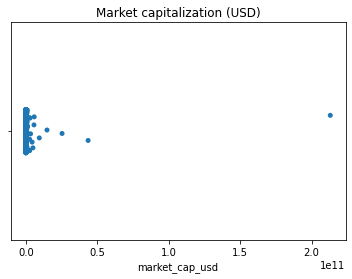

In [93]:
# EDA

# market cap distribution
ax = sns.stripplot(data=df, x='market_cap_usd')
ax.set_title('Market capitalization (USD)')
plt.show()

In [94]:
# Bitcoin dominance
btc = float(df[df.symbol == 'BTC'].market_cap_usd)
print('Bitcoin market cap', btc)

others = float(df[df.symbol != 'BTC'].market_cap_usd.sum())
print('Others market cap', others)

Bitcoin market cap 213049346737.5
Others market cap 161255513828.37848


Text(0.5, 1.0, 'Bitcoin dominance (6th Dec 2017)')

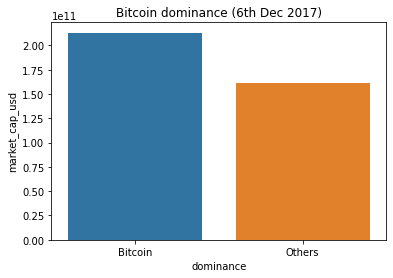

In [95]:
# 1. Visualize Bitcoin dominance

# add another column
df['dominance'] = (df.symbol == 'BTC')
df['dominance'] = df.dominance.replace({True:'Bitcoin', False:'Others'})

# create
ax = sns.barplot(data=df, x='dominance', y='market_cap_usd', estimator=np.sum, ci=None)
ax.set_title("Bitcoin dominance (6th Dec 2017)")

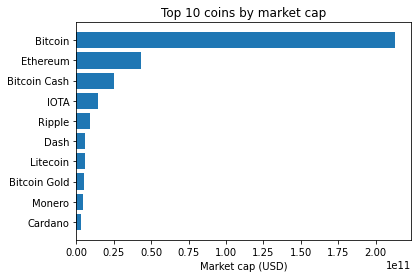

In [109]:
# 2. Top 10 coins by market cap
top10 = df.sort_values(by='market_cap_usd', ascending=True).tail(10)

plt.barh(data=top10, y='name', width='market_cap_usd')
plt.title('Top 10 coins by market cap')
plt.xlabel('Market cap (USD)')
plt.show()